<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-05%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎄 EXPLORATION 05**

- **EXPLORATION 05-1 : 학습**  
- **EXPLORATION 05-2 : 가위바위보 분류기 제작**  
    - **01_데이터 준비**  
        - 01-1_라이브러리 import
        - 01-2_데이터 import 및 이미지 resize   
        - 01-3_데이터 이미지 확인  
        - 01-4_학습용 데이터 준비   
        - 01-5_학습용 데이터 확인            
    - **02_딥러닝 네트워크 설계**  
        - 02-1_네트워크 설계  
        - 02-2_네트워크 정보 확인  
        - 02-3_네트워크 학습  
    - **03_학습 모델 테스트**  
        - 03-1_시험용 데이터 준비   
        - 03-2_시험용 데이터 확인    
        - 03-3_모델 성능 확인  
        - 03-4 모델 평가 
    - **04_모델 성능 최적화**  
        - 04-1_배치 정규화  
        - 04-2_배치 정규화 후 네트워크 정보 확인   
        - 04-3_배치 정규화 후 네트워크 학습  
        - 04-4_배치 정규화 후 모델 성능 확인  
        - 04-5_배치 정규화 후 모델 평가

<hr>

# **🌲 EXPLORATION 05-1 : 학습**

- **데이터 준비**  
- **딥러닝 네트워크 설계 / 확인 / 학습 / 평가**    
- **model.evaluate() / model.predict()**  
- **데이터 전처리 / 시각화**  
- **Sequential API**  

<hr>

# **🌲 EXPLORATION 05-2 : 가위바위보 분류기 제작**

## **🌿 01_데이터 준비**

### **🍃 01-1_라이브러리 import**

- **tensorflow, keras**  
딥러닝 프로그램 구현  
- **BatchNormalization**  
배치 정규화 실행  
- **numpy**  
수치 계산  
- **matplotlib**  
시각화  
- **os**  
운영체제 기능 사용  
- **glob**  
파일 경로를 이용한 제어  
- **Random**  
랜덤 관련  
- **PIL, cv2**  
이미지 처리  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import random
from PIL import Image

### **🍃 01-2_데이터 import 및 이미지 resize**

- **이미지 resize 함수 제작**  
    - **glob.glob()**  
    해당 저장경로 내 해당 확장자를 리스트 형식으로 반환  
    - **target_size**  
    이미지 크기 표현  
    - **Image.open()**  
    이미지 열기  
    - **.resize()**  
    이미지 사이즈 조정  
    - **Image.ANTIALIAS**  
    안티엘리어싱 (위신호 제거): 높은 해상도 사진을 낮은 해상도로 변환 시 깨짐 현상 최소화  
    -**.save()**  
    이미지 저장  

In [ ]:
def resize_images(img_path):
    '''경로 내 이미지를 28*28로 resize'''
    images = glob.glob(img_path + "/*.jpg")
    print('전체 이미지 수: ', len(images))

    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print('변환 이미지 수: ', len(images))

- **이미지 경로 import**  
train / test 각 데이터 경로 import

In [ ]:
train_rock_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/train/rock"
train_scissor_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/train/scissor"
train_paper_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/train/paper"

test_rock_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/test/rock"
test_scissor_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/test/scissor"
test_paper_image_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/test/paper"

- **위의 함수와 경로를 활용해 이미지 resize**  
train / test 각 이미지 resize

In [ ]:
print('---------------------------')
print('train 이미지 변환')
print('---------------------------')
resize_images(train_rock_image_path); print('바위 train 이미지 변환 완료','\n')
resize_images(train_scissor_image_path); print('가위 train 이미지 변환 완료','\n')
resize_images(train_paper_image_path); print('보 train 이미지 변환 완료')

print('---------------------------')
print('test 이미지 변환')
print('---------------------------')
resize_images(test_rock_image_path); print('바위 test 이미지 변환 완료','\n')
resize_images(test_scissor_image_path); print('가위 test 이미지 변환 완료','\n')
resize_images(test_paper_image_path); print('보 test 이미지 변환 완료')

print('---------------------------')
print('전체 이미지 변환 완료')
print('---------------------------')

---------------------------
train 이미지 변환
---------------------------
전체 이미지 수:  2000
변환 이미지 수:  2000
바위 train 이미지 변환 완료 

전체 이미지 수:  2000
변환 이미지 수:  2000
가위 train 이미지 변환 완료 

전체 이미지 수:  2000
변환 이미지 수:  2000
보 train 이미지 변환 완료
---------------------------
test 이미지 변환
---------------------------
전체 이미지 수:  400
변환 이미지 수:  400
바위 test 이미지 변환 완료 

전체 이미지 수:  400
변환 이미지 수:  400
가위 test 이미지 변환 완료 

전체 이미지 수:  400
변환 이미지 수:  400
보 test 이미지 변환 완료
---------------------------
전체 이미지 변환 완료
---------------------------


### **🍃 01-3_전체 데이터 이미지 확인**

- **이미지 확인**  
train / test 각 이미지, 이미지 수 확인

- **glob.glob(\*)**  
경로를 활용한 파일 리스트 추출 (\*은 임의 길이의 모든 문자열을 의미)  

In [ ]:
train_rock_image_path_images = glob.glob(train_rock_image_path + "/*.jpg")
train_scissor_image_path_images = glob.glob(train_scissor_image_path + "/*.jpg")
train_paper_image_path_images = glob.glob(train_paper_image_path + "/*.jpg")
train_images = len(train_rock_image_path_images) + len(train_scissor_image_path_images) + len(train_paper_image_path_images)

test_rock_image_path_images = glob.glob(test_rock_image_path + "/*.jpg")
test_scissor_image_path_images = glob.glob(test_scissor_image_path + "/*.jpg")
test_paper_image_path_images = glob.glob(test_paper_image_path + "/*.jpg")
test_images = len(test_rock_image_path_images) + len(test_scissor_image_path_images) + len(test_paper_image_path_images)

print('바위 train 이미지:', len(train_rock_image_path_images), '\n', train_rock_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('가위 train 이미지:', len(train_scissor_image_path_images), '\n', train_scissor_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('보 train 이미지:', len(train_paper_image_path_images), '\n', train_paper_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('바위 test 이미지:', len(test_rock_image_path_images), '\n', test_rock_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('가위 test 이미지:', len(test_scissor_image_path_images), '\n', test_scissor_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('보 test 이미지:', len(test_paper_image_path_images), '\n', test_paper_image_path_images)
print('---------------------------------------------------------------------------------------------------------------------------------------', '\n')
print('train 이미지 총 개수:', train_images, ' | ', 'test 이미지 총 개수:', test_images)

바위 train 이미지: 2000 
 ['/aiffel/aiffel/exploration/E-05/image/train/rock/515.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/rock03-077.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/rock02-029.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/112.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/107.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/74.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/1050.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/586.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/761.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/976.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/1329.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/431.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/rock03-088.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/rock04-081.jpg', '/aiffel/aiffel/exploration/E-05/image/train/rock/rock03-066.jpg', '/aiffel/aiffel/exploration/E-05/image/tra

- **이미지 변환 확인**  
train / test 각 이미지가 변경이 잘 적용되었는지 확인 (위의 이미지 중 랜덤하게 각 이미지 한개를 선정해 확인)  
    - **cv2.imread()**  
    numpy 배열 ndarray 형태로 이미지 취득  
    - **.shape**  
    이미지 형태 확인 (가로, 세로, 색)

In [ ]:
train_rock_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/train/rock/rock03-088.jpg')
train_scissor_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/train/scissor/1379.jpg')
train_paper_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/train/paper/946.jpg')

test_rock_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/test/rock/93-5.jpg')
test_scissor_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/test/scissor/635.jpg')
test_paper_image_resize_check = cv2.imread('/aiffel/aiffel/exploration/E-05/image/test/paper/2-3.jpg')


print('바위 train 이미지:', train_rock_image_resize_check.shape)
print('가위 train 이미지:', train_scissor_image_resize_check.shape)
print('보 train 이미지:', train_paper_image_resize_check.shape)

print('바위 test 이미지:', test_rock_image_resize_check.shape)
print('가위 test 이미지:', test_scissor_image_resize_check.shape)
print('보 test 이미지:', test_paper_image_resize_check.shape)

바위 train 이미지: (28, 28, 3)
가위 train 이미지: (28, 28, 3)
보 train 이미지: (28, 28, 3)
바위 test 이미지: (28, 28, 3)
가위 test 이미지: (28, 28, 3)
보 test 이미지: (28, 28, 3)


### **🍃 01-4_학습용 데이터 준비**

- **학습용 데이터 정보**  
    - 총 데이터 수 : 6000개  
    - 라벨: 3개 (0 - 바위 / 1 - 가위 / 2 - 보)  
    - 이미지 정보: 28\*28 사이즈 / 3color  
    - 입력 데이터 정규화 (0-1 사이의 값 / 최소값 0, 최대값 1에 근접)  

- **np.zeros()**  
0으로 가득 찬 array 생성  

- **.reshape()**  
배열, 차원 변형  

- **glob.iglob**  
iterator(반복자) 반환  

In [ ]:
def load_data(img_path, number_of_data=6000):

    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        #데이터 안에 이미지 행렬 복사
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        #데이터 안에 이미지 행렬 복사
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        #데이터 안에 이미지 행렬 복사
        imgs[idx,:,:,:]=img
        labels[idx]=2 
        idx=idx+1
        
    print("데이터 이미지 수:", idx, '\n')
    return imgs, labels

train_image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/train"
(x_train, y_train)=load_data(train_image_dir_path)
x_train_norm = x_train/255.0

print("x_train(학습 입력 데이터): {}".format(x_train.shape))
print("y_train(학습 정답 데이터): {}".format(y_train.shape))

데이터 이미지 수: 6000 

x_train(학습 입력 데이터): (6000, 28, 28, 3)
y_train(학습 정답 데이터): (6000,)


### **🍃 01-5_학습용 데이터 확인**

- **학습용 데이터 이미지 매칭 확인**  
각 라벨과 이미지가 잘 매치되었는지 확인  
- **random.randrange()**  
    범위 내 랜덤 정수 반환 (범위는 지정 범위의 -1까지 해당)  

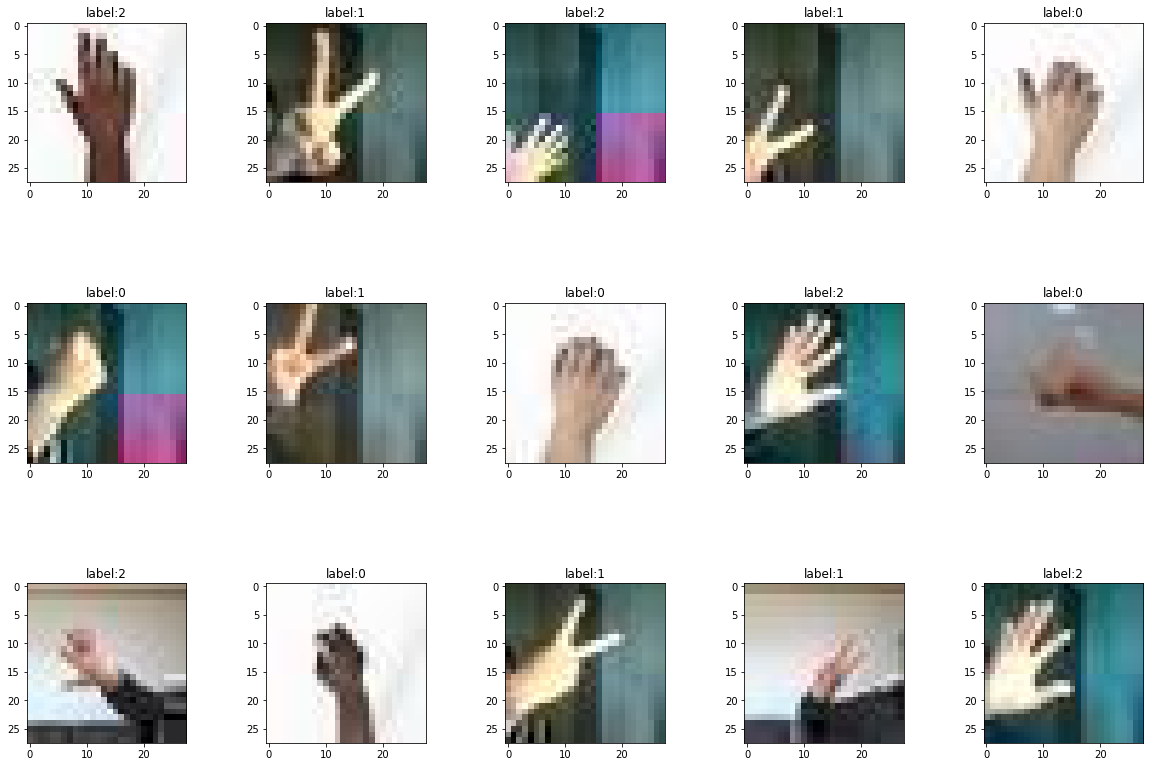

In [ ]:
plt.figure(figsize=(20, 15))

for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    random_train_image = random.randrange(6001)
    plt.imshow(x_train[random_train_image])
    plt.title('label:' + str(y_train[random_train_image]))

<hr>

## **🌿 02_딥러닝 네트워크 설계**

### **🍃 02-1_네트워크 설계**

- **keras.models.Sequential()**   
레이어를 선형으로 연결하여 구성  
- **input_shape=(28,28,3))**  
가로 * 세로 * 색 
- **.add(keras.layers.Conv2D(32, (2,2), activation='relu')**  
모델에 레이어 추가 (2D이미지 합성곱 연산 / 활성화 함수 - relu)   
- **.add(keras.layers.MaxPool2D(2,2))**  
차례로 처리되는 데이터의 크기를 줄임 / 해당 영역 내 최댓값 계산     
- **model.add(keras.layers.Flatten())**  
모델 데이터를 모두 펴서 연결  
- **model.add(keras.layers.Dense(3, activation='softmax'))**  
최종 출력 층 / 활성화 함수 - softmax

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer:', len(model.layers))

Model에 추가된 Layer: 7


Layer를 9개를 설정했을 경우, 더 낮은 정확도로 예측하므로 Layer의 수를 7개로 설정

### **🍃 02-2_네트워크 정보 확인**

- **선형 연결 레이어**  
- **네트워크 형태 확인**
- **전체 데이터 파라미터 / 학습 데이터 파라미터: 14,371**  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### **🍃 02-3_네트워크 학습**

- **학습용 데이터 이미지 매칭 확인**  
- **Epoch**  
전체 데이터 학습 횟수  
- **optimizer(옵티마이저)**  
adam 사용 (최적화 클래스 분리 구현)  
- **loss(손실함수)**  
sparse_categorical_crossentropy 사용 (정수의 형태로 라벨 제공)  

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20
169/169 [==============================] - 4s 23ms/step - loss: 0.9022 - accuracy: 0.5846 - val_loss: 0.7625 - val_accuracy: 0.5750
Epoch 2/20
169/169 [==============================] - 4s 23ms/step - loss: 0.5480 - accuracy: 0.7702 - val_loss: 0.6076 - val_accuracy: 0.6633
Epoch 3/20
169/169 [==============================] - 4s 22ms/step - loss: 0.3997 - accuracy: 0.8369 - val_loss: 0.6026 - val_accuracy: 0.6650
Epoch 4/20
169/169 [==============================] - 4s 22ms/step - loss: 0.3205 - accuracy: 0.8713 - val_loss: 0.2422 - val_accuracy: 0.9167
Epoch 5/20
169/169 [==============================] - 4s 25ms/step - loss: 0.2495 - accuracy: 0.9083 - val_loss: 0.5799 - val_accuracy: 0.7400
Epoch 6/20
169/169 [==============================] - 4s 22ms/step - loss: 0.2148 - accuracy: 0.9228 - val_loss: 0.2103 - val_accuracy: 0.9150
Epoch 7/20
169/169 [==============================] - 4s 23ms/step - loss: 0.1769 - accuracy: 0.9372 - val_loss: 0.2295 - val_accuracy: 0.9133

이 데이터에서 30회 이상 Epoch 설정 시 과적합 현상 발생하므로 epochs = 20으로 설정

<hr>

## **🌿 03_학습 모델 테스트**

### **🍃 03-1_시험용 데이터 준비**

- **학습용 데이터 정보**  
    - 총 데이터 수 : 1200개  
    - 입력 데이터 정규화 (0-1 사이의 값 / 최소값 0, 최대값 1에 근접)  

In [ ]:
test_image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E-05/image/test"
(x_test, y_test)=load_data(test_image_dir_path, number_of_data = 1200)
x_test_norm = x_test/255.0

print("x_test(시험 입력 데이터): {}".format(x_test.shape))
print("y_test(시험 정답 데이터): {}".format(y_test.shape))

데이터 이미지 수: 1200 

x_test(시험 입력 데이터): (1200, 28, 28, 3)
y_test(시험 정답 데이터): (1200,)


### **🍃 03-2_시험용 데이터 확인**

- **학습용 데이터 이미지 매칭 확인**  
각 라벨과 이미지가 잘 매치되었는지 확인  
- **random.randrange()**  
    범위 내 랜덤 정수 반환 (범위는 지정 범위의 -1까지 해당)  

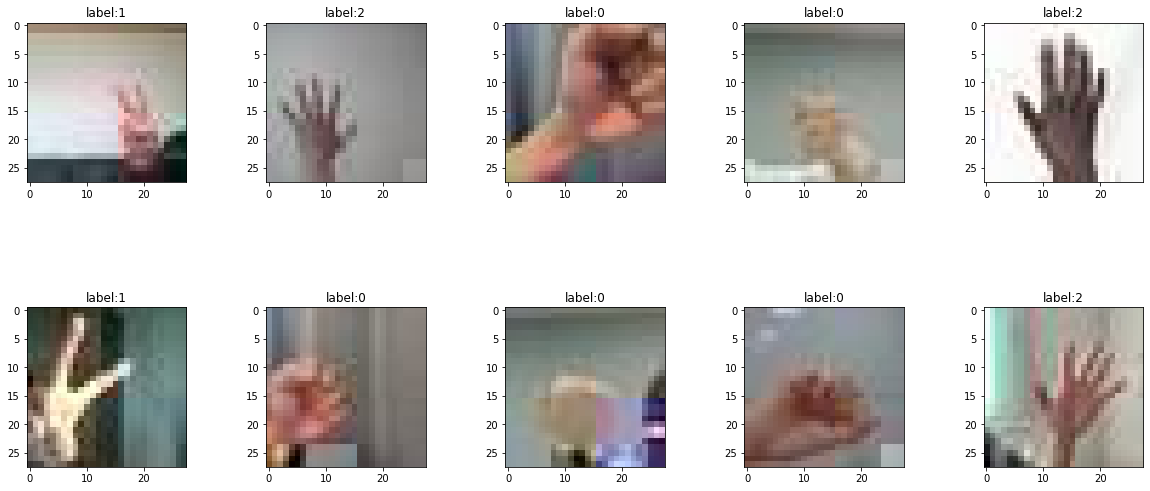

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    random_test_image = random.randrange(1201)
    plt.imshow(x_test[random_test_image])
    plt.title('label:' + str(y_test[random_test_image]))

### **🍃 03-3_모델 성능 확인**

- **모델 성능 확인**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test)
print("시험 데이터 손실 값(loss): {:.5f} ".format(test_loss))
print("시험 데이터 정확도(accuracy): {:.5f}".format(test_accuracy))

38/38 [==============================] - 0s 7ms/step - loss: 1.2683 - accuracy: 0.7133
시험 데이터 손실 값(loss): 1.26827 
시험 데이터 정확도(accuracy): 0.71333


- **모델 성능 시각화 확인**

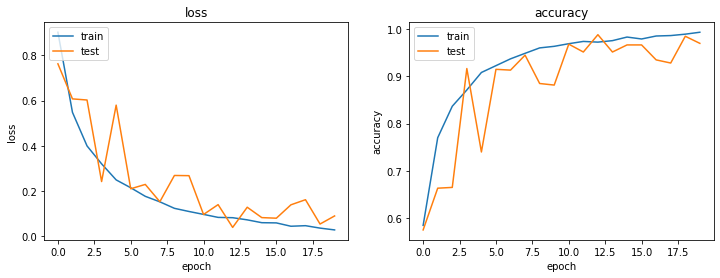

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### **🍃 03-4_모델 평가**

시험 데이터를 활용해 모델을 평가한 결과 손실 값(loss)은 1.26827, 정확도(accuracy)는 0.71333 정도로 확인 되었다. 시험 데이터가 낮은 성능을 보이는 것은 아니지만 추가 정확도 성능 상승을 위해 개선의 여지가 있다. 그래서 그래프의 곡선을 보면 편차가 심한 점을 고려해 배치 정규화를 진행하고자 한다.

<hr>

## **🌿 04_모델 성능 최적화**  

### **🍃 04-1_배치 정규화**

- **model.add(BatchNormalization())**  
배치 정규화 진행  
- **keras.models.Sequential()**   
레이어를 선형으로 연결하여 구성  
- **input_shape=(28,28,3))**  
가로 * 세로 * 색 
- **.add(keras.layers.Conv2D(32, (2,2), activation='relu')**  
모델에 레이어 추가 (2D이미지 합성곱 연산 / 활성화 함수 - relu)   
- **.add(keras.layers.MaxPool2D(2,2))**  
차례로 처리되는 데이터의 크기를 줄임 / 해당 영역 내 최댓값 계산     
- **model.add(keras.layers.Flatten())**  
모델 데이터를 모두 펴서 연결  
- **model.add(keras.layers.Dense(3, activation='softmax'))**  
최종 출력 층 / 활성화 함수 - softmax

In [ ]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(BatchNormalization())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer:', len(model.layers))

Model에 추가된 Layer: 8


### **🍃 04-2_배치 정규화 후 네트워크 정보 확인**

- **선형 연결 레이어**  
- **네트워크 형태 확인**
- **전체 데이터 파라미터 / 학습 데이터 파라미터: 14,883 / 14,627**  

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

### **🍃 04-3_배치 정규화 후 네트워크 학습**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
169/169 [==============================] - 4s 23ms/step - loss: 0.6455 - accuracy: 0.7220 - val_loss: 0.8602 - val_accuracy: 0.6200
Epoch 2/50
169/169 [==============================] - 4s 22ms/step - loss: 0.3221 - accuracy: 0.8733 - val_loss: 0.6012 - val_accuracy: 0.7783
Epoch 3/50
169/169 [==============================] - 4s 23ms/step - loss: 0.2269 - accuracy: 0.9107 - val_loss: 0.5026 - val_accuracy: 0.7583
Epoch 4/50
169/169 [==============================] - 4s 22ms/step - loss: 0.1889 - accuracy: 0.9278 - val_loss: 0.1481 - val_accuracy: 0.9450
Epoch 5/50
169/169 [==============================] - 4s 23ms/step - loss: 0.1419 - accuracy: 0.9481 - val_loss: 0.9933 - val_accuracy: 0.6183
Epoch 6/50
169/169 [==============================] - 4s 22ms/step - loss: 0.1369 - accuracy: 0.9465 - val_loss: 0.3851 - val_accuracy: 0.8450
Epoch 7/50
169/169 [==============================] - 4s 23ms/step - loss: 0.1181 - accuracy: 0.9556 - val_loss: 0.6703 - val_accuracy: 0.7833

더 많은 데이터 학습을 위해 epochs = 50으로 설정

### **🍃 04-4_배치 정규화 후 모델 성능 확인**

- **모델 성능 확인**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test)
print("시험 데이터 손실 값(loss): {:.5f} ".format(test_loss))
print("시험 데이터 정확도(accuracy): {:.5f}".format(test_accuracy))

38/38 [==============================] - 0s 8ms/step - loss: 1.7493 - accuracy: 0.7150
시험 데이터 손실 값(loss): 1.74934 
시험 데이터 정확도(accuracy): 0.71500


- **모델 성능 시각화 확인**

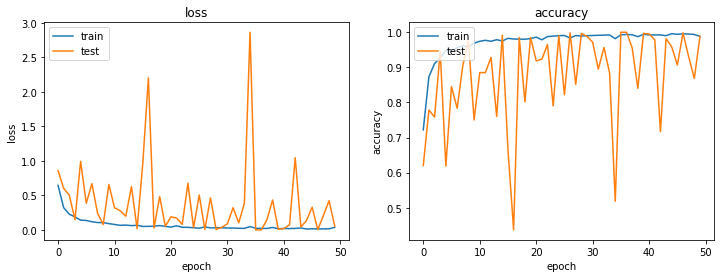

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### **🍃 04-5_배치 정규화 후 모델 평가**  

시험 데이터를 활용해 모델을 평가한 결과 손실 값(loss)은 1.74934, 정확도(accuracy)는 0.71500 정도로 둘 다 소폭 상승 되었으나 유의미한 수준은 아니다. 기존 시험 데이터의 곡선의 편차가 심해 배치 정규화를 진행했는데, 배치 정규화 후 정확도는 일부 상승했지만 오히려 곡선의 편차는 더 심하게 생기는 것을 볼 수 있다. 이로 미루어 보면 성능은 더 뛰어나더라도 데이터가 불안정한 상태라는 것을 알 수 있다.

<hr>